# Análsisi de series de tiempo


## Librerias

In [27]:
# EDA
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
%matplotlib inline


# chat_studio
from chart_studio import plotly, grid_objs
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot; init_notebook_mode(connected=True)

# Herrmientras Plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
from numpy.random import normal,seed
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error

## Dataset

In [28]:
# carga del dataset
df = pd.read_csv('delitos_sorted.csv', index_col='Año', dtype={'Año': int})


#Config
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [29]:
df.sample(10)

,Unnamed: 0,Clave_Ent,Entidad,Cve_Municipio,Municipio,Bien_jurídico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,total_year
Año,,,,,,,,,,,,,,,,,,,,,
2019,864703,4,Campeche,4004,Champotón,El patrimonio,Robo,Robo de autopartes,Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
2018,396999,13,Hidalgo,13017,Chapantongo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
2020,1109996,5,Coahuila de Zaragoza,5025,Piedras Negras,El patrimonio,Robo,Robo de autopartes,Sin violencia,0,...,0,0,1,0,0,0,0,1,0,3
2018,449625,20,Oaxaca,20002,Acatlán de Pérez Figueroa,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,1,0,1,0,0,0,0,2
2021,1394686,13,Hidalgo,13034,Lolotla,El patrimonio,Robo,Robo de autopartes,Sin violencia,0,...,0,0,0,0,0,0,0,0,0,0
2021,1443881,19,Nuevo León,19032,Lampazos de Naranjo,El patrimonio,Robo,Robo de autopartes,Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
2020,1330685,31,Yucatán,31002,Acanceh,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
2019,886849,8,Chihuahua,8048,Namiquipa,El patrimonio,Robo,Robo de autopartes,Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
2020,1319814,30,Veracruz de Ignacio de la Llave,30105,Medellín de Bravo,El patrimonio,Robo,Robo de autopartes,Sin violencia,0,...,0,0,0,0,0,1,0,0,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64876 entries, 2016 to 2021
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              64876 non-null  int64 
 1   Clave_Ent               64876 non-null  int64 
 2   Entidad                 64876 non-null  object
 3   Cve_Municipio           64876 non-null  int64 
 4   Municipio               64876 non-null  object
 5   Bien_jurídico_afectado  64876 non-null  object
 6   Tipo_de_delito          64876 non-null  object
 7   Subtipo_de_delito       64876 non-null  object
 8   Modalidad               64876 non-null  object
 9   Enero                   64876 non-null  int64 
 10  Febrero                 64876 non-null  int64 
 11  Marzo                   64876 non-null  int64 
 12  Abril                   64876 non-null  int64 
 13  Mayo                    64876 non-null  int64 
 14  Junio                   64876 non-null  int64 
 15  Julio

In [31]:
df.index.unique()


Index([2016, 2017, 2018, 2015, 2019, 2020, 2021], dtype='int32', name='Año')

## Visualización de Series de Tiempo

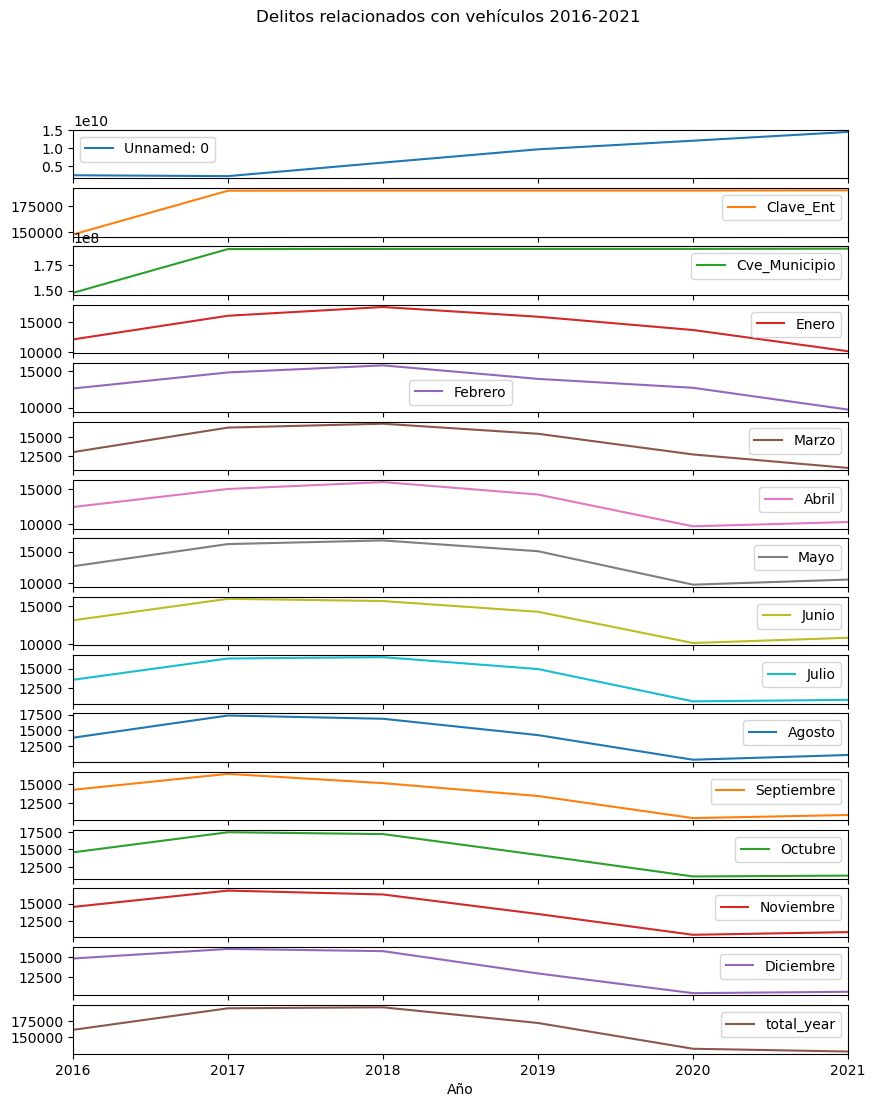

In [68]:
# Visualización básica a través de rangos
df_grouped = df.groupby(df.index).sum()  # Agrupa los datos por año y suma los valores


ax = df_grouped.loc[2016:2021].plot(subplots=True, figsize=(10, 12))

# Ajustar los límites del eje X para enfocarse en los años 2016-2021
for a in ax:
    a.set_xlim(2016, 2021)

plt.suptitle("Delitos relacionados con vehículos 2016-2021")
plt.show()

In [69]:
# Grafico de cambio porcentual basado en close
df_grouped['Change'] = df_grouped.total_year.div(df_grouped.total_year.shift())
df_grouped[['total_year','Change']].head(20)

,total_year,Change
Año,,
2015,155210,NaN
2016,161633,1.0414
2017,194557,1.2037
2018,196077,1.0078
2019,172141,0.8779
2020,132783,0.7714
2021,128572,0.9683


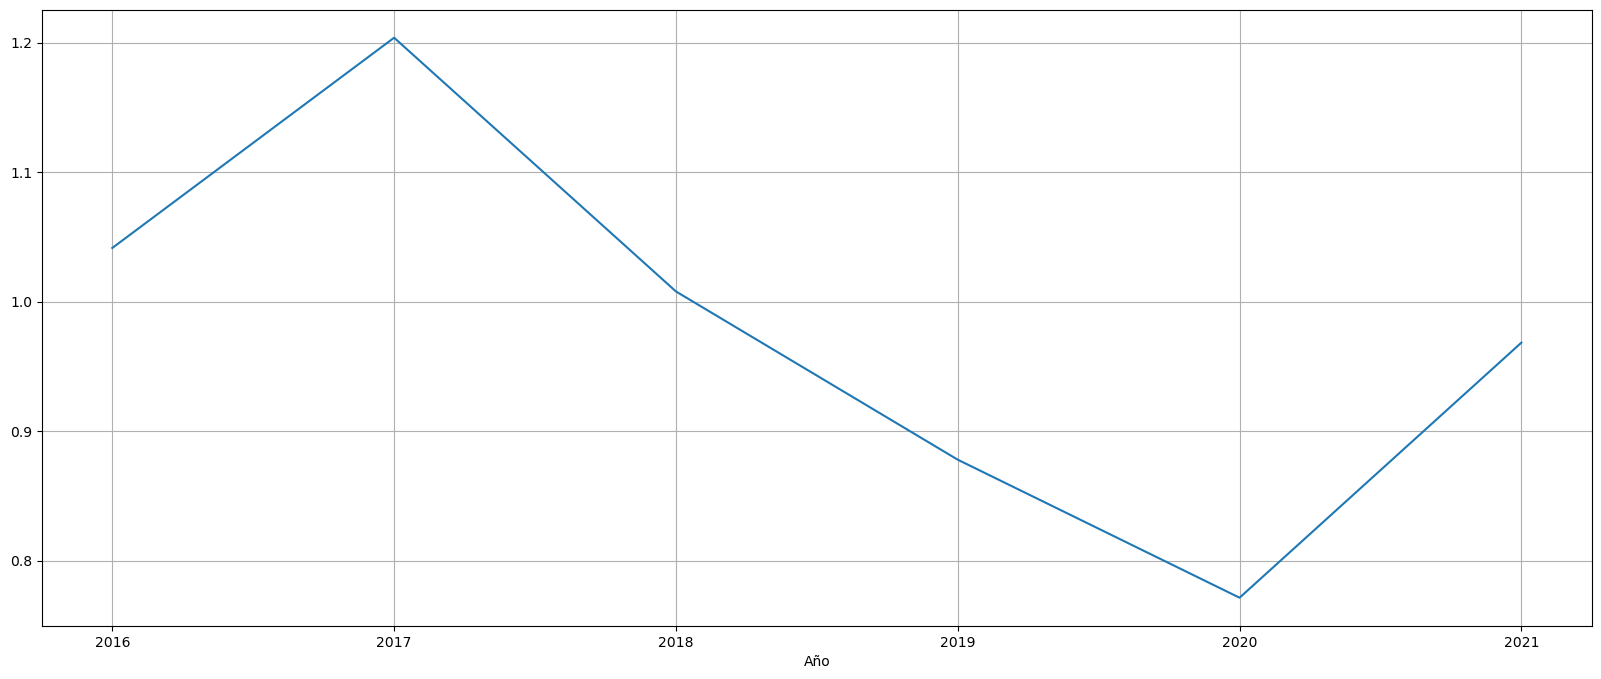

In [70]:
df_grouped['Change'].plot(figsize=(20,8)).grid()
plt.show()

In [71]:
# Calcula el Retorno
df_grouped['Return'] = df_grouped.Change.sub(1).mul(100)

In [72]:
df_grouped[['total_year','Change','Return']].head(20)

,total_year,Change,Return
Año,,,
2015,155210,NaN,NaN
2016,161633,1.0414,4.1383
2017,194557,1.2037,20.3696
2018,196077,1.0078,0.7813
2019,172141,0.8779,-12.2074
2020,132783,0.7714,-22.8638
2021,128572,0.9683,-3.1713


## Predicción simple - Medidas móviles

In [86]:
#Se genera una serie con la media móvil de 30 dias
#definicion de columnas numericas
df_num = df.select_dtypes(include=['number']) 
ma = df_num.rolling(window=3)
ma_mean = ma.mean()

In [88]:
ma_mean.tail(20)

,Unnamed: 0,Clave_Ent,Cve_Municipio,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,total_year
Año,,,,,,,,,,,,,,,,
2021,1588952.0000,32.0000,32053.3333,0.3333,0.0000,0.0000,0.3333,0.0000,0.0000,0.3333,0.0000,0.0000,0.3333,0.0000,0.3333,1.6667
2021,1588983.0000,32.0000,32053.6667,0.3333,0.0000,0.0000,0.6667,0.0000,0.0000,0.3333,0.3333,0.0000,0.3333,0.0000,0.3333,2.3333
2021,1589015.3333,32.0000,32054.0000,0.3333,0.0000,0.0000,0.6667,0.0000,0.0000,0.3333,0.3333,0.0000,0.3333,0.0000,0.3333,2.3333
2021,1589017.6667,32.0000,32054.0000,0.0000,0.0000,0.0000,0.3333,0.0000,0.0000,0.0000,0.3333,0.0000,0.0000,0.0000,0.0000,0.6667
2021,1589050.0000,32.0000,32054.3333,0.0000,0.0000,0.3333,0.0000,0.6667,0.0000,0.0000,0.0000,0.0000,0.0000,1.3333,0.0000,2.3333
2021,1589081.0000,32.0000,32054.6667,0.0000,0.0000,0.6667,0.0000,0.6667,0.3333,0.0000,0.0000,0.0000,0.0000,1.3333,0.0000,3.0000
2021,1589113.3333,32.0000,32055.0000,0.0000,0.0000,0.6667,0.0000,0.6667,0.3333,0.0000,0.0000,0.0000,0.0000,1.3333,0.0000,3.0000
2021,1589115.6667,32.0000,32055.0000,0.0000,0.0000,0.3333,0.0000,0.0000,0.3333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6667
2021,1589148.0000,32.0000,32055.3333,1.0000,0.0000,0.3333,0.6667,1.0000,1.6667,0.6667,1.0000,2.0000,1.3333,2.6667,1.3333,13.6667


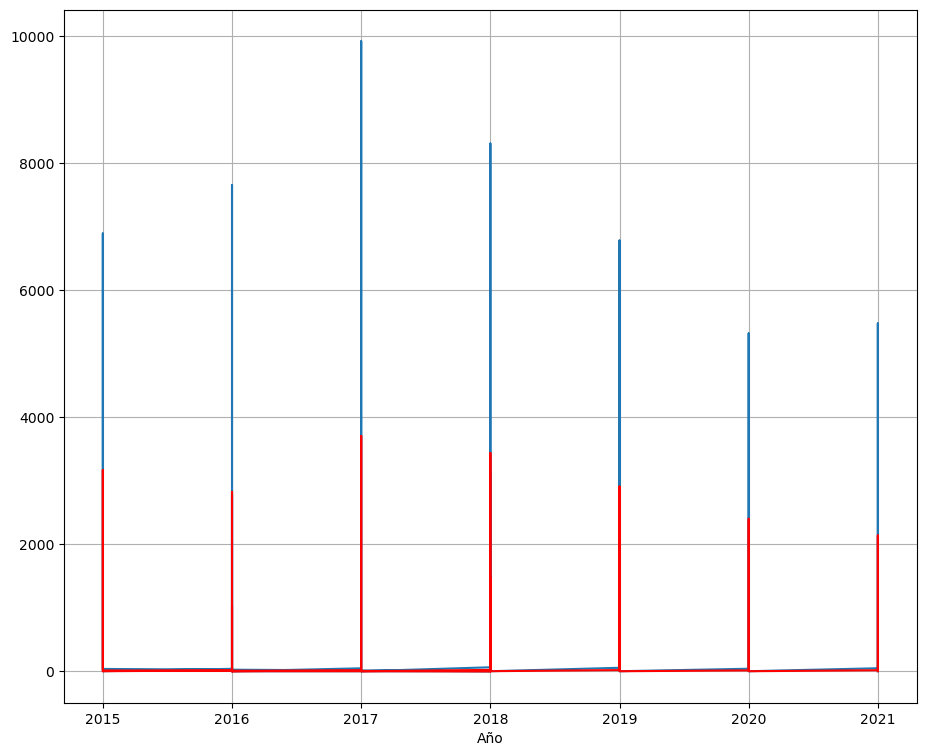

In [89]:
# Ver el dataset
df_num['total_year'].plot()
ma_mean['total_year'].plot(color="red")
plt.grid()
plt.show()

In [82]:
# prediccion

df_grouped.shape

(7, 24)

In [103]:
train_len = 5  # 70%

# Separar datos de entrenamiento y prueba correctamente
train = df_grouped.iloc[:train_len]  # Primeras 45413 filas como entrenamiento
test = df_grouped.iloc[train_len:]  # El resto como prueba

# Crear copia del DataFrame para predicciones
y_pred_sma = df_grouped.copy()

# Configurar la ventana del promedio móvil
ma_window = 2

# Calcular el promedio móvil (corregir error de escritura "rollling" -> "rolling")
y_pred_sma['sma_forecast'] = df_grouped['total_year'].rolling(ma_window).mean()

# Asignar el valor de la predicción en la posición correcta
y_pred_sma.loc[test.index, 'sma_forecast'] = y_pred_sma['sma_forecast'].iloc[train_len:]

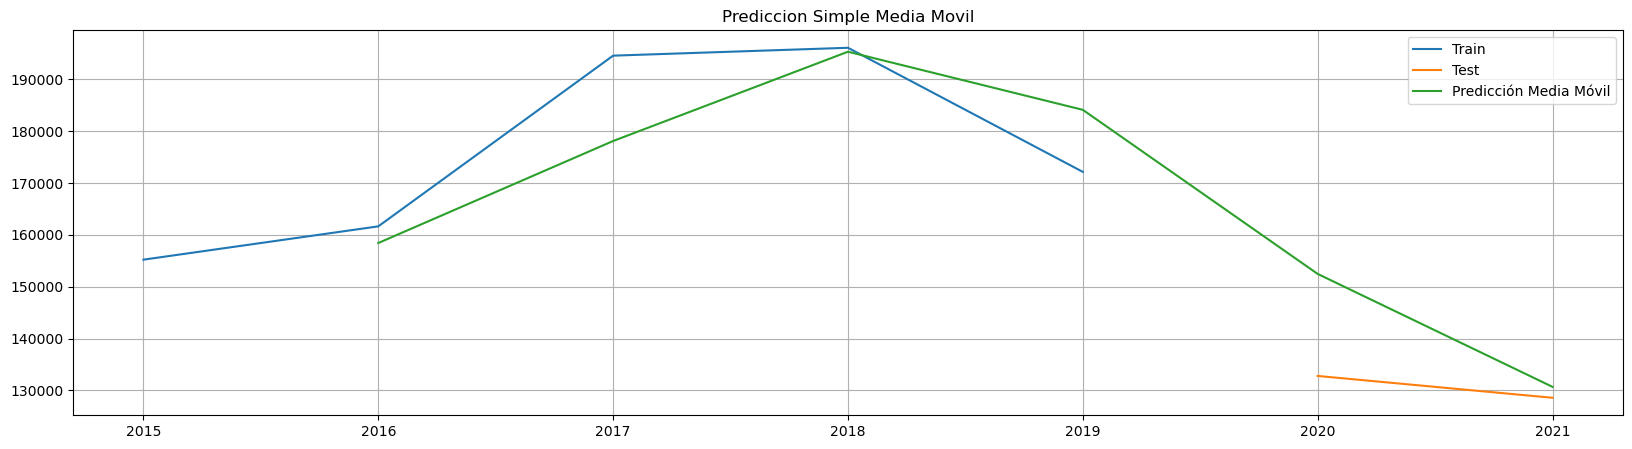

In [104]:
#Grafica de predicciones
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['total_year'], label='Train')
plt.plot(test['total_year'], label='Test')
plt.plot(y_pred_sma['sma_forecast'], label="Predicción Media Móvil")
plt.legend(loc='best')
plt.title("Prediccion Simple Media Movil")
plt.show()

In [105]:
# Validacion de la predicción
rmse = np.sqrt(mean_squared_error(test['total_year'], y_pred_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['total_year']-y_pred_sma['sma_forecast'][train_len:])/test['total_year'])*100,2)

results = pd.DataFrame({'Method':['Simple moving average forecast'],'MAPE':[mape],'RMSE':[rmse]})
results = results[['Method','RMSE','MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,13994.5700,8.2300


In [107]:
# Compara las predicciones con la data real
y_comparison = pd.DataFrame().assign(forecast=y_pred_sma['sma_forecast'])
y_comparison['observed'] = df_grouped['total_year']

In [108]:
y_comparison

,forecast,observed
Año,,
2015,NaN,155210
2016,158421.5000,161633
2017,178095.0000,194557
2018,195317.0000,196077
2019,184109.0000,172141
2020,152462.0000,132783
2021,130677.5000,128572


In [110]:
# Prediccion 2022

# Agregar el año 2022 al DataFrame
df_grouped.loc[2022] = None  # Agregamos una fila vacía para 2022

# Calcular la predicción para 2022 usando la media de 2020 y 2021
df_grouped.loc[2022, 'sma_forecast'] = df_grouped['total_year'].iloc[-2:].mean()

print(df_grouped[['total_year', 'sma_forecast']].tail(3))  # Ver los últimos 3 años


      total_year  sma_forecast
Año                           
2020 132783.0000           NaN
2021 128572.0000           NaN
2022         NaN   128572.0000


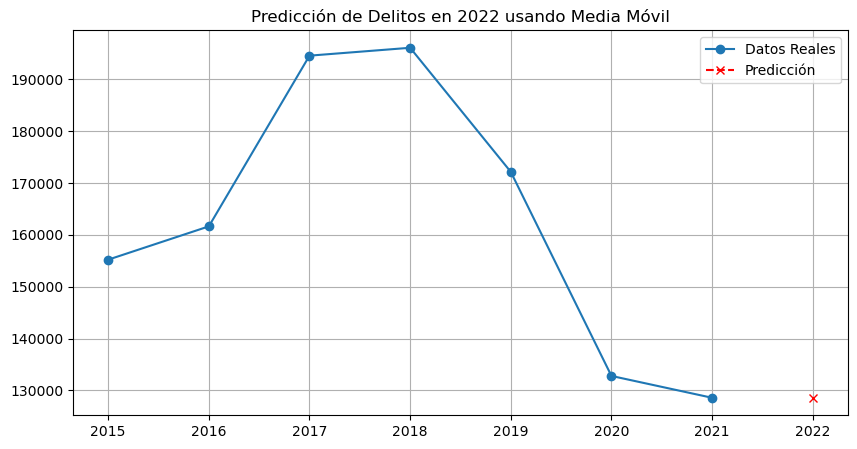

In [111]:
plt.figure(figsize=(10, 5))
plt.plot(df_grouped.index, df_grouped['total_year'], label="Datos Reales", marker='o')
plt.plot(df_grouped.index, df_grouped['sma_forecast'], label="Predicción", linestyle="dashed", marker='x', color='red')

plt.legend()
plt.title("Predicción de Delitos en 2022 usando Media Móvil")
plt.grid()
plt.show()


In [112]:
df.head()

,Unnamed: 0,Clave_Ent,Entidad,Cve_Municipio,Municipio,Bien_jurídico_afectado,Tipo_de_delito,Subtipo_de_delito,Modalidad,Enero,...,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,total_year
Año,,,,,,,,,,,,,,,,,,,,,
2016,1,16,Michoacán de Ocampo,16033,Gabriel Zamora,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,2,...,2,2,8,3,5,0,4,2,6,37
2016,2,16,Michoacán de Ocampo,16033,Gabriel Zamora,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Sin violencia,2,...,2,0,0,3,0,0,0,0,1,9
2016,7,16,Michoacán de Ocampo,16033,Gabriel Zamora,El patrimonio,Robo,Robo de autopartes,Con violencia,0,...,0,0,0,0,0,0,0,0,0,0
2016,8,16,Michoacán de Ocampo,16033,Gabriel Zamora,El patrimonio,Robo,Robo de autopartes,Sin violencia,0,...,0,0,0,0,0,0,0,0,0,0
2016,99,16,Michoacán de Ocampo,16034,Hidalgo,El patrimonio,Robo,Robo de vehículo automotor,Robo de coche de 4 ruedas Con violencia,0,...,0,0,3,1,0,0,2,2,0,9


In [115]:
df_municipios = df[['Municipio','total_year']]

df_municipios.head()

,Municipio,total_year
Año,,
2016,Gabriel Zamora,37
2016,Gabriel Zamora,9
2016,Gabriel Zamora,0
2016,Gabriel Zamora,0
2016,Hidalgo,9


In [116]:
df_municipios.shape

(64876, 2)

In [122]:
df_municipios_total = df_municipios.groupby("Municipio")["total_year"].sum().reset_index()
df_municipios_total = df_municipios_total.sort_values(by="total_year", ascending=False)

# Mostrar los primeros registros ordenados
print(df_municipios_total.head(20))


                Municipio  total_year
509   Ecatepec de Morelos       60121
2032              Tijuana       53656
594           Guadalajara       48519
2073  Tlalnepantla de Baz       27299
931              Mexicali       25724
1140               Puebla       23382
2290              Zapopan       22432
1161            Querétaro       21178
202         Benito Juárez       19290
2106               Toluca       18846
1005  Naucalpan de Juárez       18346
801                Juárez       18290
35         Aguascalientes       17141
739            Iztapalapa       16993
459    Cuautitlán Izcalli       16537
609     Gustavo A. Madero       14268
1017       Nezahualcóyotl       14040
475              Culiacán       13764
541              Ensenada       12808
467            Cuernavaca       12755


In [123]:
df_municipios_total.shape

(2331, 2)